In [1]:
import csv
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np


## Clean the data scraped

In [2]:
df_scraped = pd.read_csv("combined_csv.csv")

In [3]:
df_scraped

,Name,Reviewer ID,Member date,Living place,Languages,Job,Verified features,Nb of host coms,Date of host coms,Host coms content,Nb of guest coms,Date of guest coms,Guest coms content
0,"Bonjour, je m'appelle Britt",15663434,Membre depuis 2014,"Habite à Frederiksberg, Danemark",[],NaN,"['Identité', 'Adresse e-mail', 'Numéro de télé...",8,"['avril 2019', 'février 2017', 'février 2017',...","['Nice guests. Thanks for staying with us.', '...",0,[],[]
1,"Bonjour, je m'appelle Tonia",205753,Membre depuis 2010,"Habite à Roseville, Californie",[],Travail : artist and writer,"['Identité', 'Adresse e-mail', 'Numéro de télé...",11,"['mai 2018', 'juillet 2015', 'décembre 2014', ...","['Tonia et Randy sont des voyageurs charmants,...",0,[],[]
2,"Bonjour, je m'appelle Grant",1835118,Membre depuis 2012,"Habite à Portland, Oregon",[],NaN,"['Identité', 'Adresse e-mail', 'Numéro de télé...",20,"['août 2018', 'novembre 2017', 'novembre 2017'...","['Andrea was a dream guest! Friendly, easy-goi...",0,[],[]
3,"Bonjour, je m'appelle Walter",29474207,Membre depuis 2015,"Habite à Bella Coola, Canada",[],Travail : Retired,"['Adresse e-mail', 'Numéro de téléphone']",De la part des hôtes (2),"['octobre 2019', 'avril 2015']","['Han sido muy buenos huéspedes, son 100% reco...",De la part de voyageurs (60),"['octobre 2019', 'octobre 2019', 'octobre 2019...","['Our second time renting. Love house, feels ..."
4,"Bonjour, je m'appelle Dave",15823439,Membre depuis 2014,"Habite à Londres, Royaume-Uni",[],Travail : Advertising/Graphic Design,"['Identité', 'Adresse e-mail', 'Numéro de télé...",1,['janvier 2015'],['Dave was an exemplary guest who arrived afte...,0,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17415,"Bonjour, je m'appelle Karen",7356827,Membre depuis 2013,"Habite à Salt Lake City, Utah",['English'],Travail : Freelance stylist,"['Identité', 'Adresse e-mail', 'Numéro de télé...",22,"['juillet 2020', 'octobre 2019', 'avril 2019',...",['Karen and her family are excellent guests. C...,0,[],[]
17416,"Bonjour, je m'appelle Phabian'",1208078,Membre depuis 2011,"Habite à Phoenix, Arizona",['English'],Travail : Health & Wellness Management; Life C...,"['Identité', 'Adresse e-mail', 'Numéro de télé...",4,"['mai 2019', 'décembre 2015', 'août 2013', 'dé...",['Phabien was a great guest. He\nwill always ...,0,[],[]
17417,"Bonjour, je m'appelle Shaley",40869,Membre depuis 2009,"Habite à Portland, Oregon",[],Travail : Scratch N' Sniff Pet Care,"['Identité', 'Adresse e-mail', 'Numéro de télé...",16,"['avril 2021', 'avril 2021', 'novembre 2020', ...","['It was nice to host Shaley, they were extrem...",0,[],[]
17418,"Bonjour, je m'appelle Beatrice",2275622,Membre depuis 2012,"Habite à Munich, Allemagne","['Deutsch', 'English', 'Français']",NaN,"['Identité', 'Adresse e-mail', 'Numéro de télé...",3,"['février 2017', 'septembre 2012', 'mai 2012']",['Beatrice und ihre Schwester waren sehr angen...,0,[],[]


In [4]:
name = df_scraped["Name"]
my_string=name[0]
print(my_string.split(" m'appelle ",1)[1] )

Britt


In [5]:
# Cleaning name

name = df_scraped["Name"]
for i in range(len(name)):
    if type(name[i])==str:
        if len(name[i].split(" m'appelle ",1))>1:
            name[i]=name[i].split(" m'appelle ",1)[1]

<ipython-input-5-c0ef9b90a9fb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name[i]=name[i].split(" m'appelle ",1)[1]


In [6]:
# Cleaning Nb of hosts coms

nb_host_com = df_scraped["Nb of host coms"]
for i in range(len(nb_host_com)):
    res = re.findall('\((.*?)\)',nb_host_com[i])
    if len(res)>0:
        nb_host_com[i]=int(res[0])

<ipython-input-6-ac2dfc387fe2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nb_host_com[i]=int(res[0])


In [7]:
df_scraped.head()

,Name,Reviewer ID,Member date,Living place,Languages,Job,Verified features,Nb of host coms,Date of host coms,Host coms content,Nb of guest coms,Date of guest coms,Guest coms content
0,Britt,15663434,Membre depuis 2014,"Habite à Frederiksberg, Danemark",[],NaN,"['Identité', 'Adresse e-mail', 'Numéro de télé...",8,"['avril 2019', 'février 2017', 'février 2017',...","['Nice guests. Thanks for staying with us.', '...",0,[],[]
1,Tonia,205753,Membre depuis 2010,"Habite à Roseville, Californie",[],Travail : artist and writer,"['Identité', 'Adresse e-mail', 'Numéro de télé...",11,"['mai 2018', 'juillet 2015', 'décembre 2014', ...","['Tonia et Randy sont des voyageurs charmants,...",0,[],[]
2,Grant,1835118,Membre depuis 2012,"Habite à Portland, Oregon",[],NaN,"['Identité', 'Adresse e-mail', 'Numéro de télé...",20,"['août 2018', 'novembre 2017', 'novembre 2017'...","['Andrea was a dream guest! Friendly, easy-goi...",0,[],[]
3,Walter,29474207,Membre depuis 2015,"Habite à Bella Coola, Canada",[],Travail : Retired,"['Adresse e-mail', 'Numéro de téléphone']",2,"['octobre 2019', 'avril 2015']","['Han sido muy buenos huéspedes, son 100% reco...",De la part de voyageurs (60),"['octobre 2019', 'octobre 2019', 'octobre 2019...","['Our second time renting. Love house, feels ..."
4,Dave,15823439,Membre depuis 2014,"Habite à Londres, Royaume-Uni",[],Travail : Advertising/Graphic Design,"['Identité', 'Adresse e-mail', 'Numéro de télé...",1,['janvier 2015'],['Dave was an exemplary guest who arrived afte...,0,[],[]


In [8]:
# Cleaning Nb of guest coms

nb_guest_com = df_scraped["Nb of guest coms"]
for i in range(len(nb_host_com)):
    res = re.findall('\((.*?)\)',nb_guest_com[i])
    if len(res)>0:
        nb_guest_com[i]=int(res[0])

<ipython-input-8-19968aeb3dbf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nb_guest_com[i]=int(res[0])


In [9]:
living_place = df_scraped["Living place"]
my_string=living_place[0]
print(my_string.split(" à ",1)[1] )

Frederiksberg, Danemark


In [10]:
# Cleaning Living place

living_place = df_scraped["Living place"]
for i in range(len(living_place)):
    if type(living_place[i])==str:
        if len(living_place[i].split(" à ",1))>1:
            living_place[i]=living_place[i].split(" à ",1)[1]

<ipython-input-10-d4d05c633e98>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  living_place[i]=living_place[i].split(" à ",1)[1]


In [11]:
# Cleaning member date

member_date = df_scraped["Member date"]
for i in range(len(member_date)):
    if type(member_date[i])==str:
        if len(member_date[i].split(" depuis ",1))>1:
            member_date[i]=int(member_date[i].split(" depuis ",1)[1])

<ipython-input-11-3d156ddf1dd8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  member_date[i]=int(member_date[i].split(" depuis ",1)[1])


In [12]:
# Cleaning Job

job = df_scraped["Job"]
for i in range(len(job)):
    if type(job[i])==str:
        if len(job[i].split("Travail\xa0: ",1))>1:
            job[i]=job[i].split("Travail\xa0: ",1)[1]

<ipython-input-12-2eb7f0e778a6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job[i]=job[i].split("Travail\xa0: ",1)[1]


In [13]:
df_scraped

,Name,Reviewer ID,Member date,Living place,Languages,Job,Verified features,Nb of host coms,Date of host coms,Host coms content,Nb of guest coms,Date of guest coms,Guest coms content
0,Britt,15663434,2014,"Frederiksberg, Danemark",[],NaN,"['Identité', 'Adresse e-mail', 'Numéro de télé...",8,"['avril 2019', 'février 2017', 'février 2017',...","['Nice guests. Thanks for staying with us.', '...",0,[],[]
1,Tonia,205753,2010,"Roseville, Californie",[],artist and writer,"['Identité', 'Adresse e-mail', 'Numéro de télé...",11,"['mai 2018', 'juillet 2015', 'décembre 2014', ...","['Tonia et Randy sont des voyageurs charmants,...",0,[],[]
2,Grant,1835118,2012,"Portland, Oregon",[],NaN,"['Identité', 'Adresse e-mail', 'Numéro de télé...",20,"['août 2018', 'novembre 2017', 'novembre 2017'...","['Andrea was a dream guest! Friendly, easy-goi...",0,[],[]
3,Walter,29474207,2015,"Bella Coola, Canada",[],Retired,"['Adresse e-mail', 'Numéro de téléphone']",2,"['octobre 2019', 'avril 2015']","['Han sido muy buenos huéspedes, son 100% reco...",60,"['octobre 2019', 'octobre 2019', 'octobre 2019...","['Our second time renting. Love house, feels ..."
4,Dave,15823439,2014,"Londres, Royaume-Uni",[],Advertising/Graphic Design,"['Identité', 'Adresse e-mail', 'Numéro de télé...",1,['janvier 2015'],['Dave was an exemplary guest who arrived afte...,0,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17415,Karen,7356827,2013,"Salt Lake City, Utah",['English'],Freelance stylist,"['Identité', 'Adresse e-mail', 'Numéro de télé...",22,"['juillet 2020', 'octobre 2019', 'avril 2019',...",['Karen and her family are excellent guests. C...,0,[],[]
17416,Phabian',1208078,2011,"Phoenix, Arizona",['English'],Health & Wellness Management; Life Coach,"['Identité', 'Adresse e-mail', 'Numéro de télé...",4,"['mai 2019', 'décembre 2015', 'août 2013', 'dé...",['Phabien was a great guest. He\nwill always ...,0,[],[]
17417,Shaley,40869,2009,"Portland, Oregon",[],Scratch N' Sniff Pet Care,"['Identité', 'Adresse e-mail', 'Numéro de télé...",16,"['avril 2021', 'avril 2021', 'novembre 2020', ...","['It was nice to host Shaley, they were extrem...",0,[],[]
17418,Beatrice,2275622,2012,"Munich, Allemagne","['Deutsch', 'English', 'Français']",NaN,"['Identité', 'Adresse e-mail', 'Numéro de télé...",3,"['février 2017', 'septembre 2012', 'mai 2012']",['Beatrice und ihre Schwester waren sehr angen...,0,[],[]


## Separating before 2017 and after 2017

In [14]:
dtafile = 'Data_SF_2015_2019/Data_SF_2015_2019.dta'
df = pd.read_stata(dtafile)

In [15]:
df.head()

,listing_id,reviewer_id,Review_date,comments,scrap_date,SNAP,host_name,latitude,longitude,number_of_reviews,...,availability_30,availability_60,availability_90,availability_365,first_review,last_review,price,host_has_profile_pic,host_identity_verified,require_guest_phone_verification
0,958,6413536.0,2013-06-09,Great location near Haight Street and close to...,2015-05-04,1.0,Holly,37.76931,-122.433853,32,...,0.0,0.0,8.0,246.0,NaT,NaT,170.0,,,
1,958,33750.0,2009-11-05,We highly recommend this accomodation and agre...,2015-05-04,1.0,Holly,37.76931,-122.433853,32,...,0.0,0.0,8.0,246.0,NaT,NaT,170.0,,,
2,958,1197498.0,2014-05-16,Holly's lovely apartment is exactly as adverti...,2015-05-04,1.0,Holly,37.76931,-122.433853,32,...,0.0,0.0,8.0,246.0,NaT,NaT,170.0,,,
3,958,5975179.0,2013-06-16,Truly amazing place - great location near Haig...,2015-05-04,1.0,Holly,37.76931,-122.433853,32,...,0.0,0.0,8.0,246.0,NaT,NaT,170.0,,,
4,958,78623.0,2010-03-13,"On top of all that has been said previously, I...",2015-05-04,1.0,Holly,37.76931,-122.433853,32,...,0.0,0.0,8.0,246.0,NaT,NaT,170.0,,,


In [16]:
df = df[df['reviewer_id'].notna()]
df.reset_index(drop=True, inplace=True)

First, we have to differentiate which guests were staying in SF before and after 2017. (6 septembre 2017)

In [17]:
df["Review_date"][0]<pd.Timestamp('2017-09-06 00:00:00')

True

In [18]:
# Create two lists with each reviewer that's been to SF before, and after 2017
# Warning: For the moment, some reviewers may be counted twice in the lists

before = []
after = []
policy_date = pd.Timestamp('2017-09-06 00:00:00')

for i in range(len(df)):
    review_date = df["Review_date"][i]
    if review_date < policy_date:
        before.append(df["reviewer_id"][i])
    else:
        after.append(df["reviewer_id"][i])

In [19]:
# Create two lists with each reviewer that's been to SF before, and after 2017
# Warning: For the moment, some reviewers may be counted twice in the lists

before = []
after = []
policy_date = pd.Timestamp('2017-09-06 00:00:00')

for i in range(len(df)):
    reviewer = df["reviewer_id"][i]
    review_date = df["Review_date"][i]
    if reviewer in list(df_scraped["Reviewer ID"]):
        if review_date < policy_date:
            before.append(df["reviewer_id"][i])
        else:
            after.append(df["reviewer_id"][i])


In [120]:
df.index[df['reviewer_id'] == 44869407].tolist()

[214772]

In [122]:
df["Review_date"][214772]

Timestamp('2017-01-08 00:00:00')

In [20]:
len(list(set(before)))

14033

In [21]:
len(list(set(after)))

3128

### Adding a binary variable for jobs

In [22]:
job_binary = []
job = df_scraped["Job"]
for i in range(len(job)):
    if type(job[i])==float:
        job_binary.append(0)
    else:
        job_binary.append(1)

In [23]:
df_scraped["Job binary"] = job_binary

In [24]:
job_before = []
job_after = []

reviewer = df_scraped["Reviewer ID"]
job = df_scraped["Job"]
for i in range(len(reviewer)):
    if reviewer[i] in before:
        job_before.append(job_binary[i])
    if reviewer[i] in after:
        job_after.append(job_binary[i])

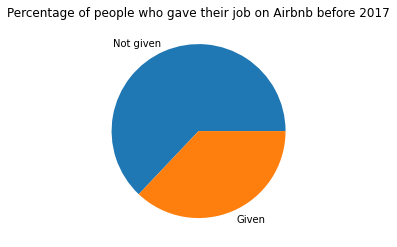

In [97]:
y = np.array([job_before.count(0), job_before.count(1)])
mylabels = ["Not given", "Given"]

plt.pie(y, labels = mylabels)
plt.title("Percentage of people who gave their job on Airbnb before 2017")
plt.show() 

In [25]:
print(job_before.count(0)/len(job_before), job_before.count(1)/len(job_before))

0.6291612057667103 0.37083879423328964


In [26]:
print(job_after.count(0)/len(job_after), job_after.count(1)/len(job_after))

0.7012666048810627 0.29873339511893726


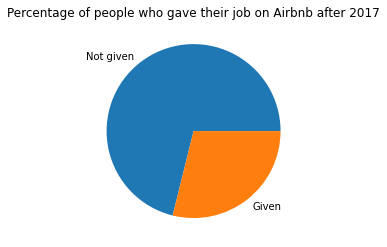

In [98]:
y = np.array([job_after.count(0), job_after.count(1)])
mylabels = ["Not given", "Given"]

plt.pie(y, labels = mylabels)
plt.title("Percentage of people who gave their job on Airbnb after 2017")
plt.show() 

### Adding a binary variable for English-speakers

In [27]:
english_binary = []
lang = df_scraped["Languages"]
for i in range(len(lang)):
    if 'English' in lang[i]:
        english_binary.append(1)
    else:
        english_binary.append(0)

In [28]:
df_scraped["English binary"] = english_binary

In [29]:
eng_before = []
eng_after = []

reviewer = df_scraped["Reviewer ID"]
lang = df_scraped["Languages"]
for i in range(len(reviewer)):
    if reviewer[i] in before:
        eng_before.append(english_binary[i])
    if reviewer[i] in after:
        eng_after.append(english_binary[i])

In [31]:
print(eng_before.count(0)/len(eng_before), eng_before.count(1)/len(eng_before))

0.7028833551769331 0.2971166448230668


In [32]:
print(eng_after.count(0)/len(eng_after), eng_after.count(1)/len(eng_after))

0.7358665430954587 0.26413345690454126


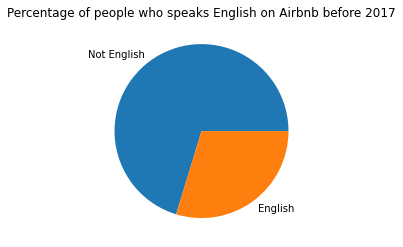

In [30]:
y = np.array([eng_before.count(0), eng_before.count(1)])
mylabels = ["Not English", "English"]

plt.pie(y, labels = mylabels)
plt.title("Percentage of people who speaks English on Airbnb before 2017")
plt.show() 

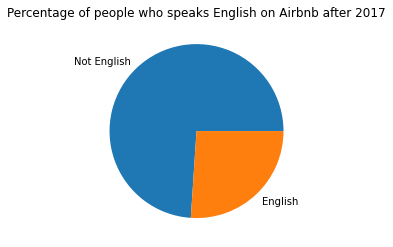

In [110]:
y = np.array([eng_after.count(0), eng_after.count(1)])
mylabels = ["Not English", "English"]

plt.pie(y, labels = mylabels)
plt.title("Percentage of people who speaks English on Airbnb after 2017")
plt.show() 

### Counting the number of languages spoken

In [33]:
lang_before = []
lang_after = []

reviewer = df_scraped["Reviewer ID"]
lang = df_scraped["Languages"]
for i in range(len(reviewer)):
    languages = list(lang[i][1:-1].split(','))
    if reviewer[i] in before:
        lang_before.append(len(languages))
    if reviewer[i] in after:
        lang_after.append(len(languages))

In [148]:
len(list(lang[0][1:-1].split(',')))

1

In [34]:
values, counts = np.unique(lang_before, return_counts=True)

In [37]:
sum(counts[3:])

466

In [38]:
print(counts[0]/sum(counts), counts[1]/sum(counts), counts[2]/sum(counts), sum(counts[3:])/sum(counts))

0.78564875491481 0.1252948885976409 0.05851900393184797 0.03053735255570118


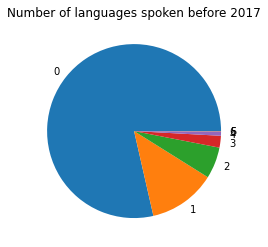

In [161]:
y = counts
mylabels = [i-1 for i in values]

plt.pie(y, labels = mylabels)
plt.title("Number of languages spoken before 2017")
plt.show() 

In [39]:
values2, counts2 = np.unique(lang_after, return_counts=True)

In [41]:
print(counts2[0]/sum(counts2), counts2[1]/sum(counts2), counts2[2]/sum(counts2), sum(counts2[3:])/sum(counts2))

0.8232931726907631 0.10627123880135929 0.04942848316342292 0.02100710534445474


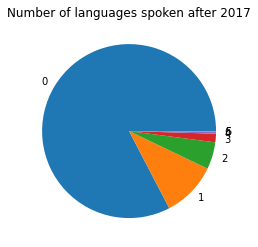

In [164]:
y = counts
mylabels = [i-1 for i in values]

plt.pie(y, labels = mylabels)
plt.title("Number of languages spoken after 2017")
plt.show() 